In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test.csv
train.csv



In [8]:
np.random.seed(1)

In [9]:
def to_one_hot(Y, num_items):
    newY = np.zeros((0, num_items))
    i = 0
    for y in Y:
        newy = np.zeros((1, num_items))
        newy[0, y[0]] = 1
        newY = np.append(newY, newy, axis=0)
    return newY

label:4


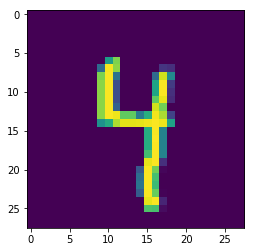

In [10]:
file_name = './input/train.csv'
df = pd.read_csv(file_name, header = 0)

original_headers = list(df.columns.values)
numpy_array = df.as_matrix()

numpy_array_random = numpy_array[:, :]
np.random.shuffle(numpy_array_random)

num_items = 10
Y_orig = numpy_array_random[:, 1:2]
Y = to_one_hot(Y_orig, num_items).T
X = numpy_array_random[:, 2:].T
X_count, m = X.shape
x_count = int(np.sqrt(X_count))

index = 5
item = X[:, index]
img_X = item.reshape((x_count, x_count))
plt.imshow(img_X, shape=(x_count, x_count))
print('label:' + str(Y_orig[index, 0]))

trainSize = 25000
devSize = (m - trainSize) // 2
train_X, dev_X, test_X = X[:, :trainSize], X[:, trainSize:(trainSize + devSize)], X[:, (trainSize + devSize):]
train_Y, dev_Y, test_Y = Y[:, :trainSize], Y[:, trainSize:(trainSize + devSize)], Y[:, (trainSize + devSize):]

In [11]:
def accuracy(p, y):
    return np.mean(p[0, :] == y[0, :])
    end

y = np.matrix([[0, 0, 1, 0, 1, 0, 1]])
p = np.matrix([[1, 0, 1, 0, 1, 1, 1]])

print(metrics.classification_report(y.T, p.T))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.60      1.00      0.75         3

avg / total       0.83      0.71      0.70         7



In [12]:
def initialize_parameters(shape):
    N = shape[0]
    xavier = 1 / N

    parameters = {}
    momentums = {}
    for l in range(1, len(shape)):
        W = (np.random.randn(shape[l], shape[l-1]) * xavier)
        b = (np.random.randn(shape[l], 1) * xavier)
        parameters[l] = {
            'W': W,
            'b': b,
        }
        
        momentums[l] = {
            'Vdw': np.zeros(W.shape),
            'Sdw': np.zeros(W.shape),
            'Vdb': np.zeros(b.shape),
            'Sdb': np.zeros(b.shape)
        }
        
        l += 1
    
    return parameters, momentums

# parameters = initialize_parameters(NN_shape)

In [13]:
def relu(Z):
    return np.maximum(0, Z)
    end

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
    end

In [14]:
def step_forward(X, W, b, activation_function = 'relu'):
    z = np.dot(W, X) + b
    
    if activation_function == 'relu':
        a = relu(z)
    else:
        a = sigmoid(z)
        
    return a, z

In [15]:
def forward_propagation(X, parameters, NN_shape):
    cache = { 0: { 'A': X } }
    A = X
    L = len(NN_shape)
    for l in range(1, L):
        params = parameters[l]
        if l < L-1:
            activation_function = 'relu'
        else:
            activation_function = 'sigmoid'
            
        A, Z = step_forward(A, params['W'], params['b'], activation_function)
        cache[l] = { 'A': A, 'Z': Z }
        
    return A, cache

In [16]:
# A, cache = forward_propagation(X, parameters, NN_shape)

In [17]:
def step_backward(Z, A_prev, W, b, dA, activation_function = 'relu'):
    if activation_function == 'relu':
        dZ = np.array(dA, copy=True)
        dZ[Z <= 0] = 0
    elif activation_function == 'sigmoid':
        s = 1 / (1 + np.exp(-Z))
        dZ = dA * s * (1-s)
    # calculate how much should we change previous parameters
    # by taking the previous activations
    # and multiplying them to the current linear activations
    dW = (np.dot(dZ, A_prev.T) / m)
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA = np.dot(W.T, dZ)
    
    return dA, dW, db

In [18]:
# last_layer_cache = cache[4]
# prev_layer_cache = cache[3]
# last_layer_params = parameters[4]
# dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))

# dA, dW, db = step_backward(last_layer_cache['Z'], prev_layer_cache['A'], last_layer_params['W'], last_layer_params['b'], dAL, 'sigmoid')

In [30]:
def backward_propagation(A, Y, parameters, NN_shape, cache):
    dA = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
    grads = {}
    for l in range(len(NN_shape)-1, 0, -1):
        c = cache[l]
        prev_c = cache[l-1]
        if l == (len(NN_shape) - 1):
            activation_function = 'sigmoid'
        else:
            activation_function = 'relu'

        params = parameters[l]
        dA, dW, db = step_backward(c['Z'], prev_c['A'], params['W'], params['b'], dA, activation_function)
        grads[l] = {
            'dW': dW,
            'db': db
        }
    return grads

In [31]:
# grads = backward_propagation(A, Y, NN_shape, cache)

In [95]:
def optimize_parameters(parameters, gradients, learning_rate, momentums, t = 0, beta1 = .9, beta2 = .999):
    eps = 0.00000001
#     print(str(t) + ': -=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--')
    
    for l in range(1, len(NN_shape)):
        grads = gradients[l]
        moms = momentums[l]
        
#         print('layer ' + str(l) + ': >>>>>>>>>>>>>>')
        
        dW = grads['dW']
        db = grads['db']
        
        Vdw = moms['Vdw']
        Sdw = moms['Sdw']

        Vdb = moms['Vdb']
        Sdb = moms['Sdb']
        
#         print(Vdw, Vdb, Sdw, Sdb)
                
        Vdw = (beta1 * Vdw) + ((1 - beta1) * dW)
        Vdb = (beta1 * Vdb) + ((1 - beta1) * db)
        
        Sdw = (beta2 * Sdw) + ((1 - beta2) * np.power(dW, 2))
        Sdb = (beta2 * Sdb) + ((1 - beta2) * np.power(db, 2))
        
#         print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
        
#         print((1 - np.power(beta1, t)), (1 - np.power(beta2, t)))
        
#         print(Vdw, Vdb, Sdw, Sdb)
        
        Vdw_corrected = Vdw / (1 - np.power(beta1, t+1))
        Vdb_corrected = Vdb / (1 - np.power(beta1, t+1))
        
        Sdw_corrected = Sdw / (1 - np.power(beta2, t+1))
        Sdb_corrected = Sdb / (1 - np.power(beta2, t+1))
        
        parameters[l]['W'] = parameters[l]['W'] - learning_rate * (Vdw_corrected / (np.sqrt(Sdw_corrected) + eps))
        parameters[l]['b'] = parameters[l]['b'] - learning_rate * (Vdb_corrected / (np.sqrt(Sdb_corrected) + eps))

        momentums[l]['Vdw'] = Vdw
        momentums[l]['Vdb'] = Vdb
        
        momentums[l]['Sdw'] = Sdw
        momentums[l]['Sdb'] = Sdb
        
    return parameters, momentums

In [136]:
def model(NN_shape, X, Y, epoch_size = 1000, learning_rate=0.0001, num_iterations=2500, epoch_costs_count = 5000):
    costs = []
    temp_costs = []
    epoch_i = 0
    parameters, momentums = initialize_parameters(NN_shape)
    total = X.shape[1]
    for i in range(0, num_iterations):
        epoch_start = 0
        while epoch_start < total:
            start = epoch_start
            end = min(epoch_start + epoch_size, total)
            
            epoch_start = epoch_start + epoch_size
            x = X[:, start:end]
            y = Y[:, start:end]
            
            learning_rate = learning_rate / 1.001

            a, cache = forward_propagation(x, parameters, NN_shape)
            gradients = backward_propagation(a, y, parameters, NN_shape, cache)
            parameters, momentums = optimize_parameters(parameters, gradients, learning_rate, momentums, epoch_i)
            cost = np.mean(np.sum(((-np.dot(y,np.log(a).T) - np.dot(1-y, np.log(1 - a).T)) / epoch_size), axis=0, keepdims=True))
            temp_costs.append(cost)
            
            if len(temp_costs) == epoch_costs_count:
                epoch_i = epoch_i + 1
                mean_costs = np.mean(temp_costs)
                costs.append(mean_costs)
                
                dev_A, dev_cache = forward_propagation(dev_X, parameters, NN_shape)
                dev_cost = np.mean(np.sum(((-np.dot(dev_Y,np.log(dev_A).T) - np.dot(1-dev_Y, np.log(1 - dev_A).T)) / dev_A.shape[1]), axis=0, keepdims=True))
                
                train_A, train_cache = forward_propagation(train_X, parameters, NN_shape)
                train_cost = np.mean(np.sum(((-np.dot(train_Y,np.log(train_A).T) - np.dot(1-train_Y, np.log(1 - train_A).T)) / train_A.shape[1]), axis=0, keepdims=True))
                
                print(str(i) + ': cost after ' + str(epoch_costs_count) + '(' + str(epoch_costs_count * epoch_size) + ')' + ' epochs: ' + str(mean_costs) + ' | train cost: ' + str(train_cost) + ' | dev cost: ' + str(dev_cost) + ' || lr: ' + str(learning_rate))
                temp_costs = []
            
#             if ((i % 100) == 0) and (i != 0):
#                 print(str(i) + '>> cost: ' + str(cost))
            
    return costs, parameters, a

# batch gradient descent
#     costs = []
#     parameters = initialize_parameters(NN_shape)
#     for i in range(0, num_iterations):
#         A, cache = forward_propagation(X, parameters, NN_shape)
#         gradients = backward_propagation(A, Y, parameters, NN_shape, cache)
#         parameters = optimize_parameters(parameters, gradients, learning_rate)

#         cost = np.sum(((-np.dot(Y,np.log(A).T) - np.dot(1-Y, np.log(1 - A).T)) / m), axis=1, keepdims=True) / 10
        
#         if ((i % 100) == 0) and (i != 0):
#             print(str(i) + '>> cost: ' + str(cost))

In [137]:
NN_shape = np.array([X_count, 50, 25, 25, 20, 15, 10])
epoch_size = 1000
learning_rate = .5
num_iterations = 1000
epoch_costs_count = 100
costs, params, A = model(NN_shape, train_X, train_Y, epoch_size, learning_rate, num_iterations, epoch_costs_count)

/Applications/MAMP/htdocs/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/Applications/MAMP/htdocs/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Applications/MAMP/htdocs/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


3: cost after 100(100000) epochs: nan | train cost: nan | dev cost: nan || lr: 0.452441315448893
7: cost after 100(100000) epochs: nan | train cost: nan | dev cost: nan || lr: 0.40940628785024946
11: cost after 100(100000) epochs: nan | train cost: nan | dev cost: nan || lr: 0.37046463885602987
15: cost after 100(100000) epochs: nan | train cost: nan | dev cost: nan || lr: 0.33522701706264246


KeyboardInterrupt: 